<a href="https://colab.research.google.com/github/SanBartolome/IA-diploma-course-2021/blob/main/1_Introduccion_a_Neural_Networks_Solucionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASE 1: Introduccion a Neural Networks

# MNIST dataset

El **MNIST** es un conjunto de datos **desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges** para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Las imágenes de los dígitos fueron tomadas de una variedad de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. **Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total)**. Se utiliza una división estándar del conjunto de datos para evaluar y comparar modelos, en la que **se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo**.

Es una tarea de reconocimiento de dígitos. Como tal, **hay 10 dígitos (0 a 9) o 10 clases para predecir**. Los resultados se informan utilizando el error de predicción. Excelentes resultados consiguen un error de predicción inferior al 1%. Una predicción de aproximadamente 0.2% se puede lograr con Redes Neuronales Convolucionales grandes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

**Keras** es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow entre otros frameworks. 

Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de **Aprendizaje Profundo**. Sus fuertes se centran en ser **amigable para el usuario, modular y extensible**.

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import itertools

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255.0) 

# Flatten the images.
train_images = train_images.reshape((-1, 784))


11501568/11490434 [==============================] - 0s 0us/step


**Pregunta 1. Normalice y transforme el test set**

In [3]:
# Normalize the images.
# COMPLETAR...
test_images = (test_images / 255.0) 
# Flatten the images.
# COMPLETAR...
test_images = test_images.reshape((-1, 784))

In [4]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [5]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
Train_images, Val_images, Train_labels, Val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)

# Train the model.
h = model.fit(
  Train_images,
  Train_labels,
  validation_data=(Val_images, Val_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1688/1688 [==============================] - 15s 7ms/step - loss: 0.2952 - accuracy: 0.9149 - val_loss: 0.1700 - val_accuracy: 0.9483
Epoch 2/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1362 - accuracy: 0.9588 - val_loss: 0.1253 - val_accuracy: 0.9625
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.1097 - val_accuracy: 0.9668
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0769 - accuracy: 0.9753 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 5/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0960 - val_accuracy: 0.9725


### Evaluación del modelo

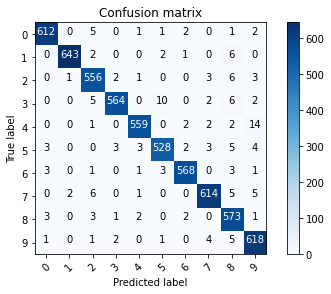

In [6]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Pregunta 2. Brevemente, interprete los resultados de la matriz de confusión**

El modelo entrenado clasifica con gran precision las clases requeridas. La mayoria de imagenes del conjunto de validacion han sido clasificadas correctamente, sin embargo existe algunos casos donde el modelo falla. La clase con un mayor indice de error ocurre en la clase 4, donde 17 imagenes fueron clasificadas incorrectamente por el modelo ya que realmente eran de clase 9. 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


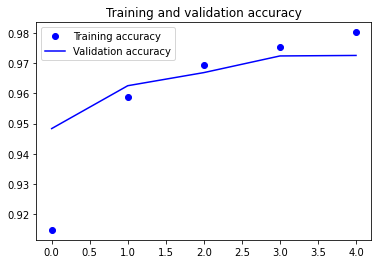

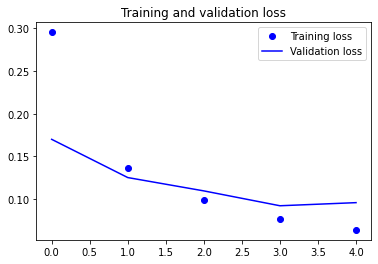

In [7]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**Pregunta 3. Brevemente, interprete los resultados de los learning curves en el train y val. ¿Se puede considerar un aprendizaje adecuado o existe underfitting u overfitting?**

Ambas graficas muestran el progreso de aprendizaje del modelo construido. En la primera grafica se observa que el conjunto de entrenamiento empieza con un accuracy cercano al 90% en la epoca 0 y termina con 98% en la epoca 5, lo cual es terminos practicos es bastante bueno. Sin embargo esto tendria que validarse ya que podriamos caer en overfitting. La curva de validacion es buena igualmente pero empeora en la ultima epoca. En la grafica de loss, los errores de entrenamiento y validacion son bajos, lo cual es consecuente con la primera grafica. asi mismo podemos observar que en la epoca 5 el error de validacion es mayor el de entrenamiento. Se sugiere probar con mas epocas para confirmar si la epoca 5 es el punto inicial de overfitting.

### Ejemplos de predicción

In [8]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]
[7 2 1 0 4]


### Reporte de clasificación

In [9]:
#get the predictions for the test data

predictions = model.predict(test_images) 
predicted_classes = np.argmax(predictions,axis=1)

#get the indices to be plotted
y_true = test_labels
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [10]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       980
     Class 1       0.99      0.97      0.98      1135
     Class 2       0.97      0.98      0.97      1032
     Class 3       0.98      0.97      0.97      1010
     Class 4       0.98      0.96      0.97       982
     Class 5       0.97      0.97      0.97       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.98      0.97      0.97      1028
     Class 8       0.95      0.97      0.96       974
     Class 9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Pregunta 4. Brevemente, explique su interpretación sobre los resultados previamete mostrados en el conjunto de test**

Los resultados del reporte de clasificacion son bastante buenos. Es posible ver que el f1-score de cada clase es bastante alto, asi mismo los precision y recall son igualmente altos y balanceados (ambos altos y cercanos). Esto permite que el modelo tenga un accuracy igualmente alto. Podriamos decir que para tener resultados asi en el conjunto de test, nos encontramos en un caso ideal.

# Fashion MNIST dataset

Adaptado de: https://www.tensorflow.org/tutorials/keras/classification

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. Se hace uso de [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay X imagenes en el set de entrenamiento, con cada imagen representada por pixeles de P x P:

**Pregunta 5. Ejecute la(s) sentencia(s) necesarias para conocer la cantidad de imágenes y dimensiones de cada imagen**

In [14]:
#COMPLETAR...
train_images.shape

(60000, 28, 28)

**Pregunta 6. ¿Cuántas etiquetas hay en el conjunto de entrenamiento?**

Asimismo, hay E etiquetas en el set de entrenamiento:

In [15]:
#COMPLETAR...
len(train_labels)

60000

Cada etiqueta es un integro entre 0 y 9:

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [17]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [18]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

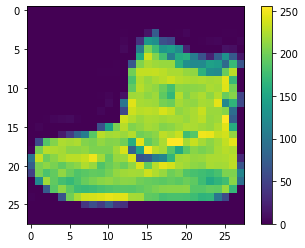

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

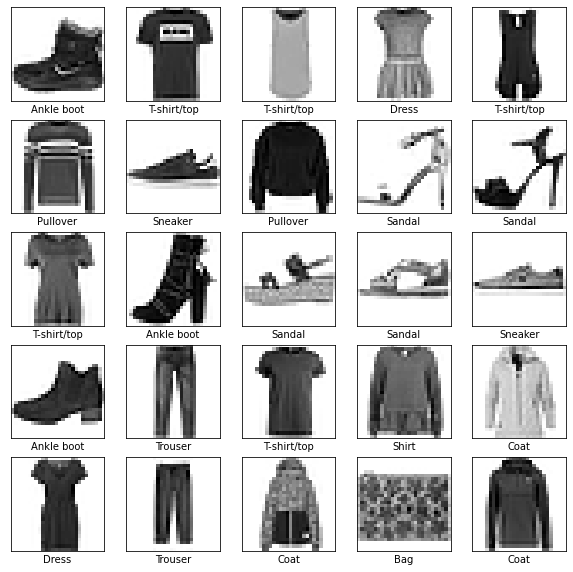

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2671 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.91 (o 91%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3518 - accuracy: 0.8780 - 782ms/epoch - 2ms/step

Test accuracy: 0.878000020980835


**Pregunta 7. Compare este resultado evaluado en el TEST SET contra lo obtenido en el TRAIN SET. ¿Se trata de un aprendizaje adecuado o existe underfitting u overfitting?**

Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [26]:
predictions = model.predict(test_images)

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [27]:
predictions[0]

array([1.6473672e-06, 1.2700230e-10, 5.0865307e-08, 4.3782816e-10,
       2.4518243e-07, 1.4374322e-03, 8.4573946e-07, 1.7176608e-02,
       1.0836843e-06, 9.8138213e-01], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [28]:
np.argmax(predictions[0])

9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [29]:
test_labels[0]

9

Grafique esto para poder ver todo el set de la prediccion de las 10 clases.

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

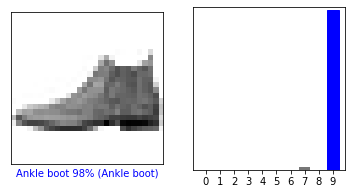

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Pregunta 8. Muestre otro ejemplo de predicción que sea CORRECTO**

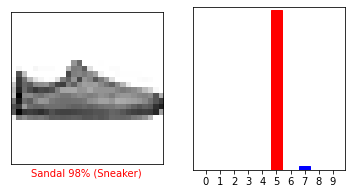

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Pregunta 9. Muestre otro ejemplo de predicción que sea INCORRECTO**

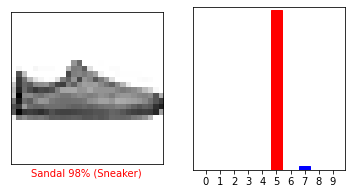

In [33]:
for i in range(0,100):
  predicted_label = np.argmax(predictions[i])
  if predicted_label != test_labels[i]:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    break

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

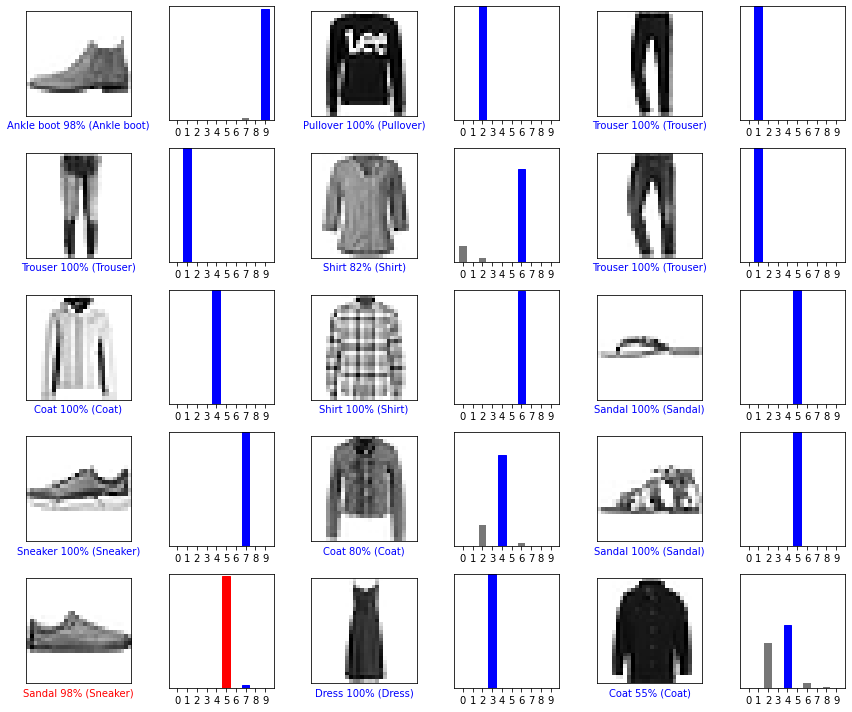

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.1864835e-06 5.1678505e-12 9.9914896e-01 9.2228660e-09 5.0976520e-05
  2.0777577e-13 7.9380436e-04 1.5808975e-13 7.7518099e-09 3.7013582e-15]]


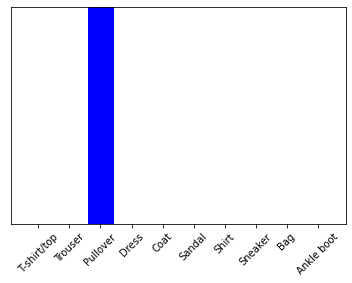

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [39]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.

**Pregunta 10. Pruebe y obtenga resultados sobre otra configuración de la arquitectura, hiperparámetros, etc. Interprete brevemente sus resultados.**

In [45]:
#Tomar como guia la implementacion hecha en clase y customizarla a su preferencia.
# 1875/1875 [==============================] - 5s 3ms/step - loss: 0.2400 - accuracy: 0.9095

# 313/313 - 1s - loss: 0.3518 - accuracy: 0.8780 - 782ms/epoch - 2ms/step
# Test accuracy: 0.878000020980835

In [56]:
loss_functions = ['sparse_categorical_crossentropy', 'kullback_leibler_divergence']

In [57]:
for floss in loss_functions:
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
              loss=floss,
              metrics=['accuracy'])
  model.fit(train_images, train_labels, epochs=15)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5057 - accuracy: 0.8194
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3743 - accuracy: 0.8627
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8760
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3164 - accuracy: 0.8826
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2973 - accuracy: 0.8899
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2710 - accuracy: 0.8983
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9016
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2526 - accuracy: 0.9050
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.245

Según lo probado lo que más influyó en la mejora de accuracy es la cantidad de épocas, en segundo lugar la arquitectura, en cambio, el resto de parámetros (optimizer, loss) es mejor mantenerlos.